In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64
Unnamed: 0    0
ID            0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
2

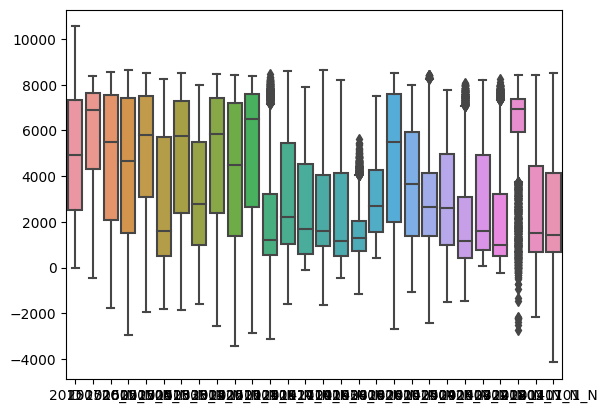

Validation Accuracy: 0.8681


In [2]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df=pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
test_df=pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
import warnings
warnings.filterwarnings("ignore")

print(df.isnull().sum())
print(test_df.isnull().sum())

test_df = test_df.drop(columns=["Unnamed: 0"])
df = df.drop(columns=["Unnamed: 0"])
X = df.drop(columns=["ID", "class"])
y = df["class"]
X_test = test_df.drop(columns=["ID"])

import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df)
plt.show()

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_imputed)
X_test_final = scaler.transform(X_test)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train Logistic Regression model
model = LogisticRegression(multi_class="multinomial", max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

pred = model.predict(X_test_final)
df = pd.DataFrame({'ID': test_df['ID'], 'class': encoder.inverse_transform(pred)})
df.to_csv("SubmissionModel2.csv", index=False)